<a href="https://colab.research.google.com/github/jason96819/Classification-of-soccer-player-types/blob/main/Data%20collection%2C%20refining%2C%20and%20preprocessing/4_1_%EC%88%98%EB%B9%84%EC%88%98_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('3_군집하기위한데이터.csv')
df = df.drop(columns=['Unnamed: 0'])
df['롱패스'] = df['롱패스 시도'] + df['중거리패스 시도']
df = df[['출전시간', '득점', '도움', '슈팅', '스로인', '드리블 시도', '키패스', '전방 패스 시도',
       '후방 패스 시도', '횡패스 시도', '공격지역패스 시도', '수비지역패스 시도', '중앙지역패스 시도', '롱패스',
       '숏패스 시도', '크로스 시도', '경합 지상 시도', '경합 공중 시도', '태클 시도', '클리어링',
       '인터셉트', '차단', '획득', '블락', '파울', '피파울', 'Position']]
df.columns = ['Time', 'Goal', 'Ass', 'Shoot', 'Throw', 'Dribble', 'KPass', 'FP', 'BP', 'CP', 'AP', 'DP', 'MP', 'LP', 'SP', 'Cross', 'RG', 'RS', 'Takkle', 'Clearing', 'Intercept', 'Cut', 'Acq', 'Block', 'Foul', 'Fouled', 'Position']
df

,Time,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
0,386,3,0,11,3,16,1,24,19,48,...,12,10,3,6,6,24,8,11,10,FW
1,541,1,0,6,0,3,4,69,54,44,...,17,13,9,14,14,39,15,11,10,MF
2,3287,12,13,64,5,46,78,293,327,432,...,41,83,22,35,29,200,45,23,20,FW
3,2941,0,1,21,0,7,9,392,265,585,...,99,73,116,100,74,215,96,38,34,MF
4,694,0,1,9,1,5,4,166,83,132,...,18,19,10,22,14,74,18,11,17,MF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,285,0,1,0,16,2,4,104,41,70,...,4,1,5,3,12,27,2,2,3,DF
1697,1671,5,6,27,0,35,30,146,151,264,...,76,13,6,29,30,106,0,29,20,FW
1698,2456,1,0,11,2,1,4,581,80,532,...,121,22,72,53,134,221,15,42,18,DF
1699,624,0,0,1,46,3,0,161,85,90,...,7,2,4,7,19,41,0,15,8,DF


In [ ]:
p = df['Position']
df = df.drop(columns=['Position'])

In [ ]:
for i in range(len(df)):
    x = df.Time[i] / 60
    df.iloc[i, :] /= x
df = df.drop(columns=['Time'])
df = pd.concat([df, p], axis=1)
df

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
0,0.466321,0.000000,1.709845,0.466321,2.487047,0.155440,3.730570,2.953368,7.461140,7.150259,...,1.865285,1.554404,0.466321,0.932642,0.932642,3.730570,1.243523,1.709845,1.554404,FW
1,0.110906,0.000000,0.665434,0.000000,0.332717,0.443623,7.652495,5.988909,4.879852,4.658041,...,1.885397,1.441774,0.998152,1.552680,1.552680,4.325323,1.663586,1.219963,1.109057,MF
2,0.219045,0.237298,1.168239,0.091269,0.839671,1.423791,5.348342,5.968969,7.885610,9.309401,...,0.748403,1.515059,0.401582,0.638880,0.529358,3.650745,0.821418,0.419836,0.365075,FW
3,0.000000,0.020401,0.428426,0.000000,0.142809,0.183611,7.997280,5.406324,11.934716,3.835430,...,2.019721,1.489289,2.366542,2.040122,1.509691,4.386263,1.958518,0.775247,0.693642,MF
4,0.000000,0.086455,0.778098,0.086455,0.432277,0.345821,14.351585,7.175793,11.412104,7.780980,...,1.556196,1.642651,0.864553,1.902017,1.210375,6.397695,1.556196,0.951009,1.469741,MF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,8.631579,14.736842,9.894737,...,0.842105,0.210526,1.052632,0.631579,2.526316,5.684211,0.421053,0.421053,0.631579,DF
1697,0.179533,0.215440,0.969479,0.000000,1.256732,1.077199,5.242370,5.421903,9.479354,10.771993,...,2.728905,0.466786,0.215440,1.041293,1.077199,3.806104,0.000000,1.041293,0.718133,FW
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,1.954397,12.996743,0.464169,...,2.956026,0.537459,1.758958,1.294788,3.273616,5.399023,0.366450,1.026059,0.439739,DF
1699,0.000000,0.000000,0.096154,4.423077,0.288462,0.000000,15.480769,8.173077,8.653846,7.115385,...,0.673077,0.192308,0.384615,0.673077,1.826923,3.942308,0.000000,1.442308,0.769231,DF


In [ ]:
df.to_csv('4_군집화데이터진짜최종.csv')

# DF 군집

In [ ]:
DF = df[df['Position'] == 'DF']
DF

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,RS,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position
5,0.034247,0.017123,0.428082,5.479452,0.684932,0.325342,12.671233,5.821918,8.065068,7.328767,...,1.575342,1.780822,2.602740,2.089041,1.386986,3.613014,1.695205,0.650685,0.907534,DF
6,0.034414,0.017207,0.395756,3.080011,0.240895,0.189274,13.817035,2.684256,11.993117,2.804703,...,3.768282,1.342128,4.370519,2.753083,1.755090,1.892744,1.858331,0.412962,0.481790,DF
7,0.069606,0.000000,0.330626,0.104408,0.000000,0.034803,9.466357,1.287703,14.129930,0.765661,...,4.332947,0.817865,4.593968,2.732019,1.270302,2.331787,1.861949,0.556845,0.174014,DF
9,0.078023,0.052016,0.364109,4.135241,1.404421,0.572172,9.024707,6.345904,8.894668,7.464239,...,1.794538,1.300390,1.794538,1.508453,1.066320,3.198960,1.482445,0.754226,0.962289,DF
13,0.021452,0.042903,0.085806,0.364676,0.064355,0.085806,10.940293,2.574187,11.154809,1.351448,...,2.059349,0.686450,3.925635,2.509832,1.115481,1.994995,1.630318,0.321773,0.364676,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.000000,0.050378,0.000000,5.088161,0.302267,0.604534,17.984887,10.931990,13.098237,11.284635,...,0.654912,0.403023,0.554156,1.108312,2.821159,5.440806,0.050378,0.604534,1.057935,DF
1693,0.000000,0.000000,0.097324,0.048662,0.000000,0.000000,12.019465,0.656934,12.408759,0.121655,...,2.433090,0.437956,1.411192,0.754258,2.530414,4.501217,0.389294,0.535280,0.389294,DF
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,8.631579,14.736842,9.894737,...,0.842105,0.210526,1.052632,0.631579,2.526316,5.684211,0.421053,0.421053,0.631579,DF
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,1.954397,12.996743,0.464169,...,2.956026,0.537459,1.758958,1.294788,3.273616,5.399023,0.366450,1.026059,0.439739,DF


In [ ]:
temp_DF = DF

전체 데이터 분포 확인

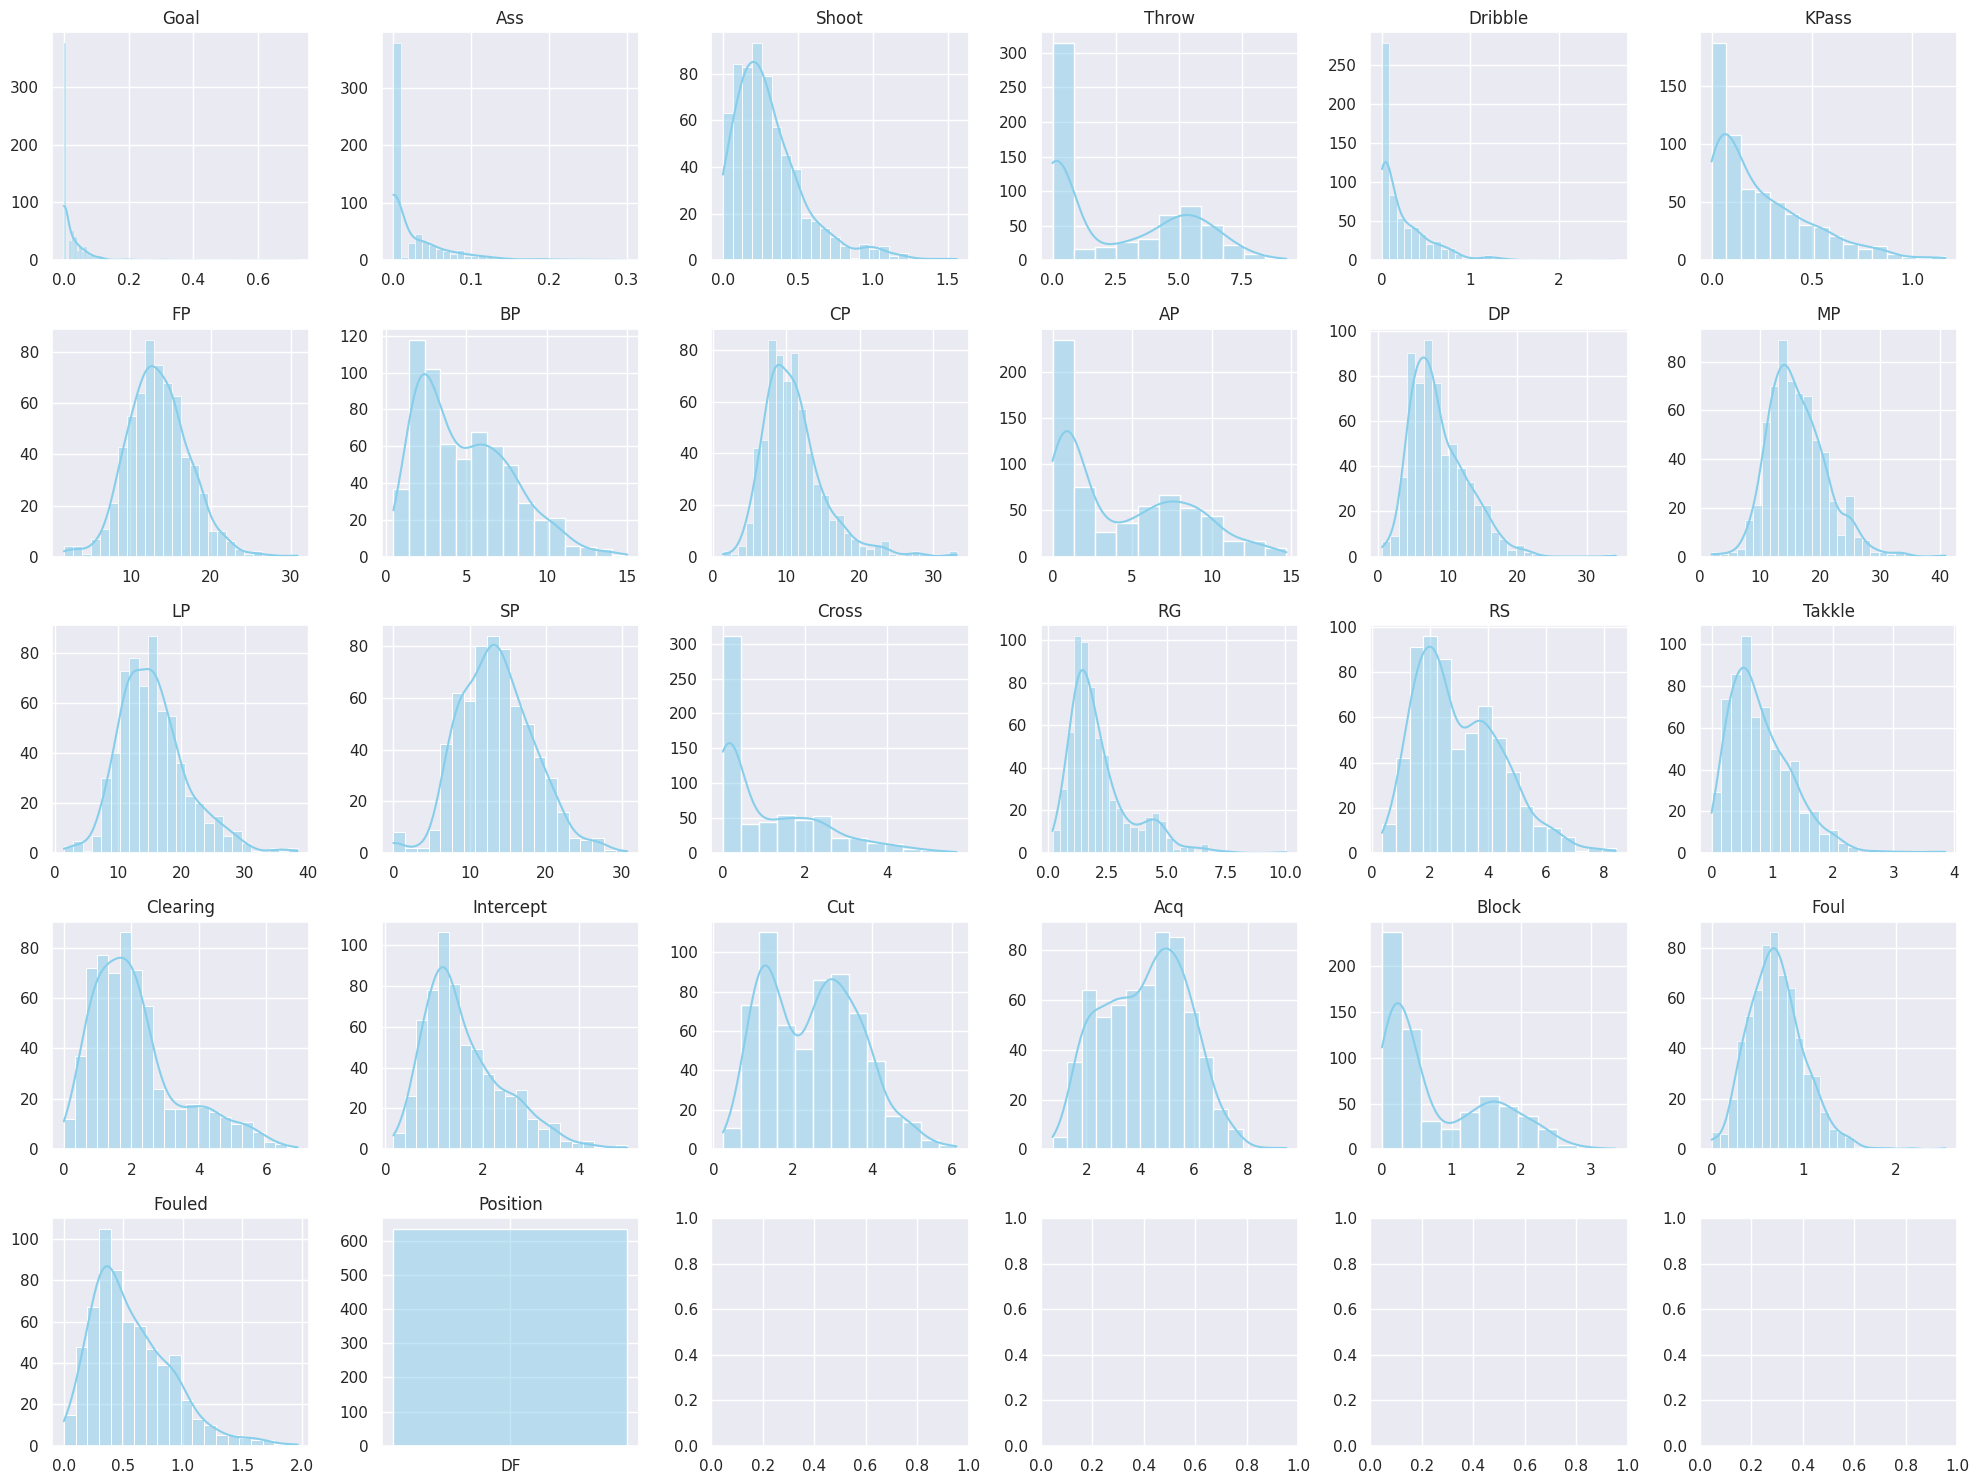

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_DF.columns):
    sns.histplot(data=temp_DF[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

<ipython-input-9-ea80159c7e1b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = temp_DF.corr()


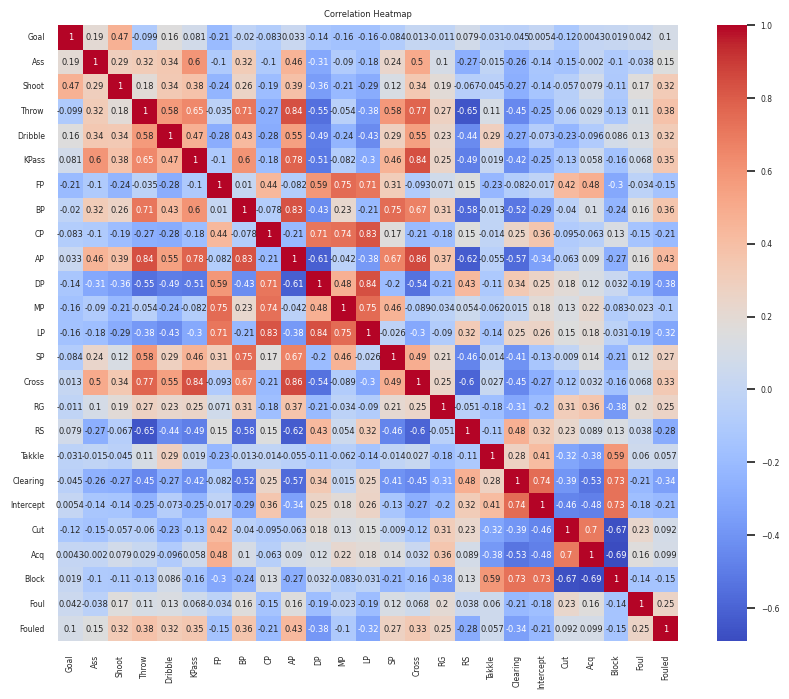

In [ ]:
# 상관관계 분석
corr = temp_DF.corr()

# 히트맵 그리기
sns.set(font_scale=0.5)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 수비수 군집화

도메인 지식 이용: 축구 경험이 있거나 축구에 대한 전문 지식을 가지고 있다면, 어떤 속성이 선수 역할에 가장 영향을 미치는지 예측할 수 있습니다. 이를 바탕으로 일부 속성을 선택할 수 있습니다.

중앙 수비수와 측면 수비수를 나누는 기준 : 스로인, 크로스

In [ ]:
temp_DF1 = temp_DF[['Throw', 'Cross']]
temp_DF1

,Throw,Cross
5,5.479452,1.797945
6,3.080011,1.548609
7,0.104408,0.052204
9,4.135241,2.392718
13,0.364676,0.364676
...,...,...
1690,5.088161,3.123426
1693,0.048662,0.024331
1696,3.368421,2.736842
1698,0.048860,0.097720


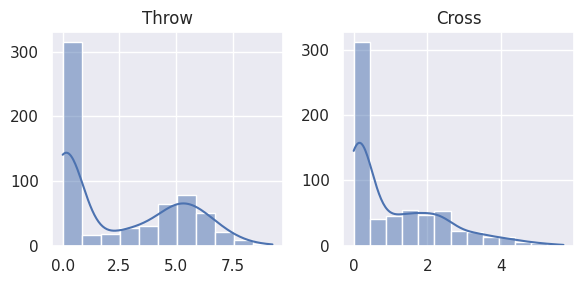

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_DF1.columns):
    sns.histplot(data=temp_DF1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# 제곱근 변환 함수 정의
def sqrt_transform(x):
    return np.sqrt(x)

In [ ]:
for i in range(len(temp_DF1.columns)):
    temp_DF1[temp_DF1.columns[i]] = temp_DF1[temp_DF1.columns[i]].apply(sqrt_transform)

<ipython-input-13-556869a18705>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF1[temp_DF1.columns[i]] = temp_DF1[temp_DF1.columns[i]].apply(sqrt_transform)


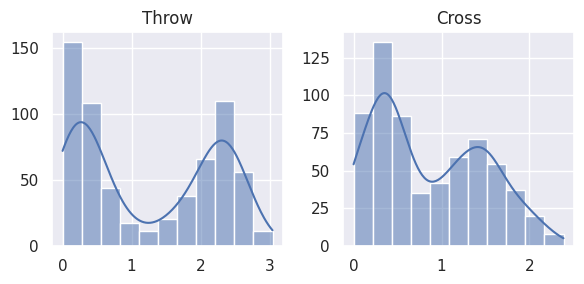

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_DF1.columns):
    sns.histplot(data=temp_DF1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 군집화 수행

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km_DF = KMeans(n_clusters=2)
km_DF.fit(temp_DF1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
temp_DF1['Role'] = km_DF.labels_

<ipython-input-17-64180f083d70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF1['Role'] = km_DF.labels_


In [ ]:
temp_DF1

,Throw,Cross,Role
5,2.340823,1.340875,1
6,1.754996,1.244431,1
7,0.323123,0.228482,0
9,2.033529,1.546841,1
13,0.603884,0.603884,0
...,...,...,...
1690,2.255695,1.767322,1
1693,0.220594,0.155984,0
1696,1.835326,1.654340,1
1698,0.221043,0.312602,0


In [ ]:
temp_DF1[temp_DF1['Role']==0].describe()                                                                               #CB

,Throw,Cross,Role
count,331.000000,331.000000,331.0
mean,0.342316,0.345453,0.0
std,0.307769,0.249852,0.0
min,0.000000,0.000000,0.0
25%,0.000000,0.202272,0.0
50%,0.294192,0.330816,0.0
75%,0.482842,0.491888,0.0
max,1.577352,1.521361,0.0


In [ ]:
temp_DF1[temp_DF1['Role']==1].describe()                                                                               #FB

,Throw,Cross,Role
count,304.000000,304.000000,304.0
mean,2.223780,1.417115,1.0
std,0.345972,0.393127,0.0
min,0.959000,0.000000,1.0
25%,2.052221,1.164252,1.0
50%,2.277087,1.423118,1.0
75%,2.447664,1.646646,1.0
max,3.041500,2.387336,1.0


In [ ]:
temp_DF['Role'] = km_DF.labels_

<ipython-input-21-8f71d15d6e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF['Role'] = km_DF.labels_


In [ ]:
temp_DF['Role'][temp_DF['Role'] == 0] = 'CB'
temp_DF['Role'][temp_DF['Role'] == 1] = 'FB'

<ipython-input-22-6d99836b8274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF['Role'][temp_DF['Role'] == 0] = 'CB'
<ipython-input-22-6d99836b8274>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF['Role'][temp_DF['Role'] == 0] = 'CB'
<ipython-input-22-6d99836b8274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF['Role'][temp_DF['Role'] == 1] = 'FB'
<ipython-input-22-6d99836b8274>:2: SettingWithCopyWarning: 
A

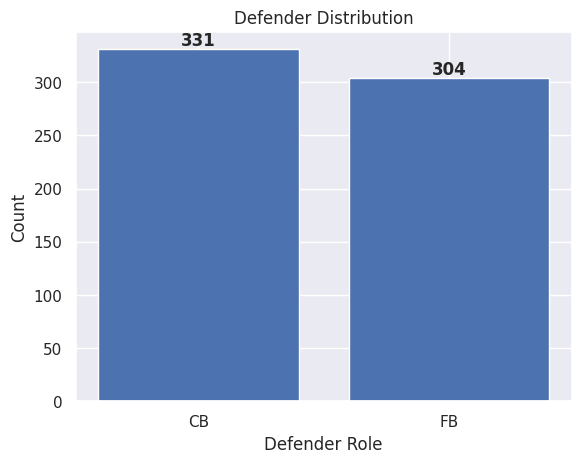

In [ ]:
sns.set(style='darkgrid')

counts = temp_DF['Role'].value_counts().loc[['CB', 'FB']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Defender Distribution')
plt.xlabel('Defender Role')
plt.ylabel('Count')
plt.show()

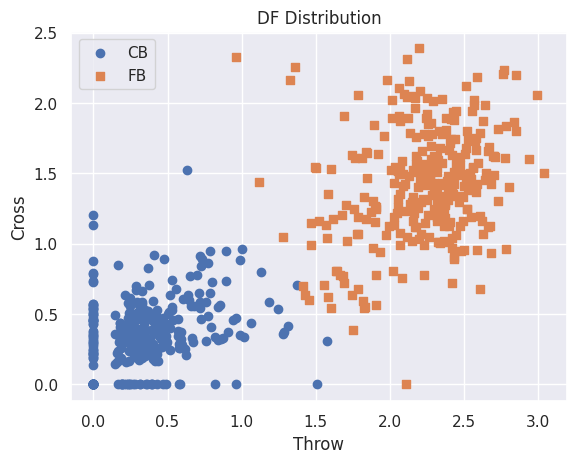

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_DF1[temp_DF1['Role']==0].index
marker1 = temp_DF1[temp_DF1['Role']==1].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_DF1.loc[marker0, 'Throw'], y=temp_DF1.loc[marker0, 'Cross'], marker='o', label='CB')
plt.scatter(x=temp_DF1.loc[marker1, 'Throw'], y=temp_DF1.loc[marker1, 'Cross'], marker='s', label='FB')

plt.xlabel('Throw')
plt.ylabel('Cross')
plt.title('DF Distribution')
plt.legend()
plt.show()

In [ ]:
temp_DF

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position,Role
5,0.034247,0.017123,0.428082,5.479452,0.684932,0.325342,12.671233,5.821918,8.065068,7.328767,...,1.780822,2.602740,2.089041,1.386986,3.613014,1.695205,0.650685,0.907534,DF,FB
6,0.034414,0.017207,0.395756,3.080011,0.240895,0.189274,13.817035,2.684256,11.993117,2.804703,...,1.342128,4.370519,2.753083,1.755090,1.892744,1.858331,0.412962,0.481790,DF,FB
7,0.069606,0.000000,0.330626,0.104408,0.000000,0.034803,9.466357,1.287703,14.129930,0.765661,...,0.817865,4.593968,2.732019,1.270302,2.331787,1.861949,0.556845,0.174014,DF,CB
9,0.078023,0.052016,0.364109,4.135241,1.404421,0.572172,9.024707,6.345904,8.894668,7.464239,...,1.300390,1.794538,1.508453,1.066320,3.198960,1.482445,0.754226,0.962289,DF,FB
13,0.021452,0.042903,0.085806,0.364676,0.064355,0.085806,10.940293,2.574187,11.154809,1.351448,...,0.686450,3.925635,2.509832,1.115481,1.994995,1.630318,0.321773,0.364676,DF,CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.000000,0.050378,0.000000,5.088161,0.302267,0.604534,17.984887,10.931990,13.098237,11.284635,...,0.403023,0.554156,1.108312,2.821159,5.440806,0.050378,0.604534,1.057935,DF,FB
1693,0.000000,0.000000,0.097324,0.048662,0.000000,0.000000,12.019465,0.656934,12.408759,0.121655,...,0.437956,1.411192,0.754258,2.530414,4.501217,0.389294,0.535280,0.389294,DF,CB
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,8.631579,14.736842,9.894737,...,0.210526,1.052632,0.631579,2.526316,5.684211,0.421053,0.421053,0.631579,DF,FB
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,1.954397,12.996743,0.464169,...,0.537459,1.758958,1.294788,3.273616,5.399023,0.366450,1.026059,0.439739,DF,CB


In [ ]:
DF['Role'] = km_DF.labels_
DF['Role'][DF['Role'] == 0] = 'CB'
DF['Role'][DF['Role'] == 1] = 'FB'
DF

<ipython-input-26-071dab91a8cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Role'] = km_DF.labels_
<ipython-input-26-071dab91a8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Role'][DF['Role'] == 0] = 'CB'
<ipython-input-26-071dab91a8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Role'][DF['Role'] == 0] = 'CB'
<ipython-input-26-071dab91a8cf>:3: Setting

,Goal,Ass,Shoot,Throw,Dribble,KPass,FP,BP,CP,AP,...,Takkle,Clearing,Intercept,Cut,Acq,Block,Foul,Fouled,Position,Role
5,0.034247,0.017123,0.428082,5.479452,0.684932,0.325342,12.671233,5.821918,8.065068,7.328767,...,1.780822,2.602740,2.089041,1.386986,3.613014,1.695205,0.650685,0.907534,DF,FB
6,0.034414,0.017207,0.395756,3.080011,0.240895,0.189274,13.817035,2.684256,11.993117,2.804703,...,1.342128,4.370519,2.753083,1.755090,1.892744,1.858331,0.412962,0.481790,DF,FB
7,0.069606,0.000000,0.330626,0.104408,0.000000,0.034803,9.466357,1.287703,14.129930,0.765661,...,0.817865,4.593968,2.732019,1.270302,2.331787,1.861949,0.556845,0.174014,DF,CB
9,0.078023,0.052016,0.364109,4.135241,1.404421,0.572172,9.024707,6.345904,8.894668,7.464239,...,1.300390,1.794538,1.508453,1.066320,3.198960,1.482445,0.754226,0.962289,DF,FB
13,0.021452,0.042903,0.085806,0.364676,0.064355,0.085806,10.940293,2.574187,11.154809,1.351448,...,0.686450,3.925635,2.509832,1.115481,1.994995,1.630318,0.321773,0.364676,DF,CB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,0.000000,0.050378,0.000000,5.088161,0.302267,0.604534,17.984887,10.931990,13.098237,11.284635,...,0.403023,0.554156,1.108312,2.821159,5.440806,0.050378,0.604534,1.057935,DF,FB
1693,0.000000,0.000000,0.097324,0.048662,0.000000,0.000000,12.019465,0.656934,12.408759,0.121655,...,0.437956,1.411192,0.754258,2.530414,4.501217,0.389294,0.535280,0.389294,DF,CB
1696,0.000000,0.210526,0.000000,3.368421,0.421053,0.842105,21.894737,8.631579,14.736842,9.894737,...,0.210526,1.052632,0.631579,2.526316,5.684211,0.421053,0.421053,0.631579,DF,FB
1698,0.024430,0.000000,0.268730,0.048860,0.024430,0.097720,14.193811,1.954397,12.996743,0.464169,...,0.537459,1.758958,1.294788,3.273616,5.399023,0.366450,1.026059,0.439739,DF,CB


## 실루엣 계수 확인

In [ ]:
temp_DF1

,Throw,Cross,Role
5,2.340823,1.340875,1
6,1.754996,1.244431,1
7,0.323123,0.228482,0
9,2.033529,1.546841,1
13,0.603884,0.603884,0
...,...,...,...
1690,2.255695,1.767322,1
1693,0.220594,0.155984,0
1696,1.835326,1.654340,1
1698,0.221043,0.312602,0


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp_DF1[['Throw', 'Cross']], temp_DF1['Role'])
score_samples.shape

(635,)

In [ ]:
temp_DF['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp_DF1[['Throw', 'Cross']], temp_DF1['Role'])
np.round(average_score, 4)

<ipython-input-30-de5d523b621d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_DF['silhouette_coeff'] = score_samples


0.7324

In [ ]:
temp_DF.groupby('Role')['silhouette_coeff'].mean()

Role
CB    0.771116
FB    0.690184
Name: silhouette_coeff, dtype: float64



---



#중앙 수비수 CB

- aggresor : 앞으로 나가서 수비하는 것을 좋아함. 태클과 드리블하길 좋아한다.
- spreader : 수비수 중 빌드업 담당 길고 다이렉트한 패스를 한다.
- safety center back : 안전한 패스를 하며 수비 반경을 골문 근처로 삼는다. 걷어내기나 슛 차단을 잘한다.

- aggresor 속성 : 인터셉트, 드리블
- spreader 속성 : 롱패스, 횡패스, 숏패스, 커팅
- scb 속성 : 경합, 블락, 클리어링

In [ ]:
CB = temp_DF[temp_DF['Role'] == 'CB']

In [ ]:
temp_CB = CB[['AP', 'DP', 'LP']]
temp_CB

,AP,DP,LP
7,0.765661,8.683295,17.784223
13,1.351448,6.607079,16.324634
23,0.337079,18.012640,28.209270
28,0.513657,12.547901,18.980840
30,0.189633,12.932996,26.207332
...,...,...,...
1670,0.887460,11.228296,16.707395
1671,0.275229,8.348624,10.091743
1675,0.300000,9.600000,14.700000
1693,0.121655,11.800487,16.301703


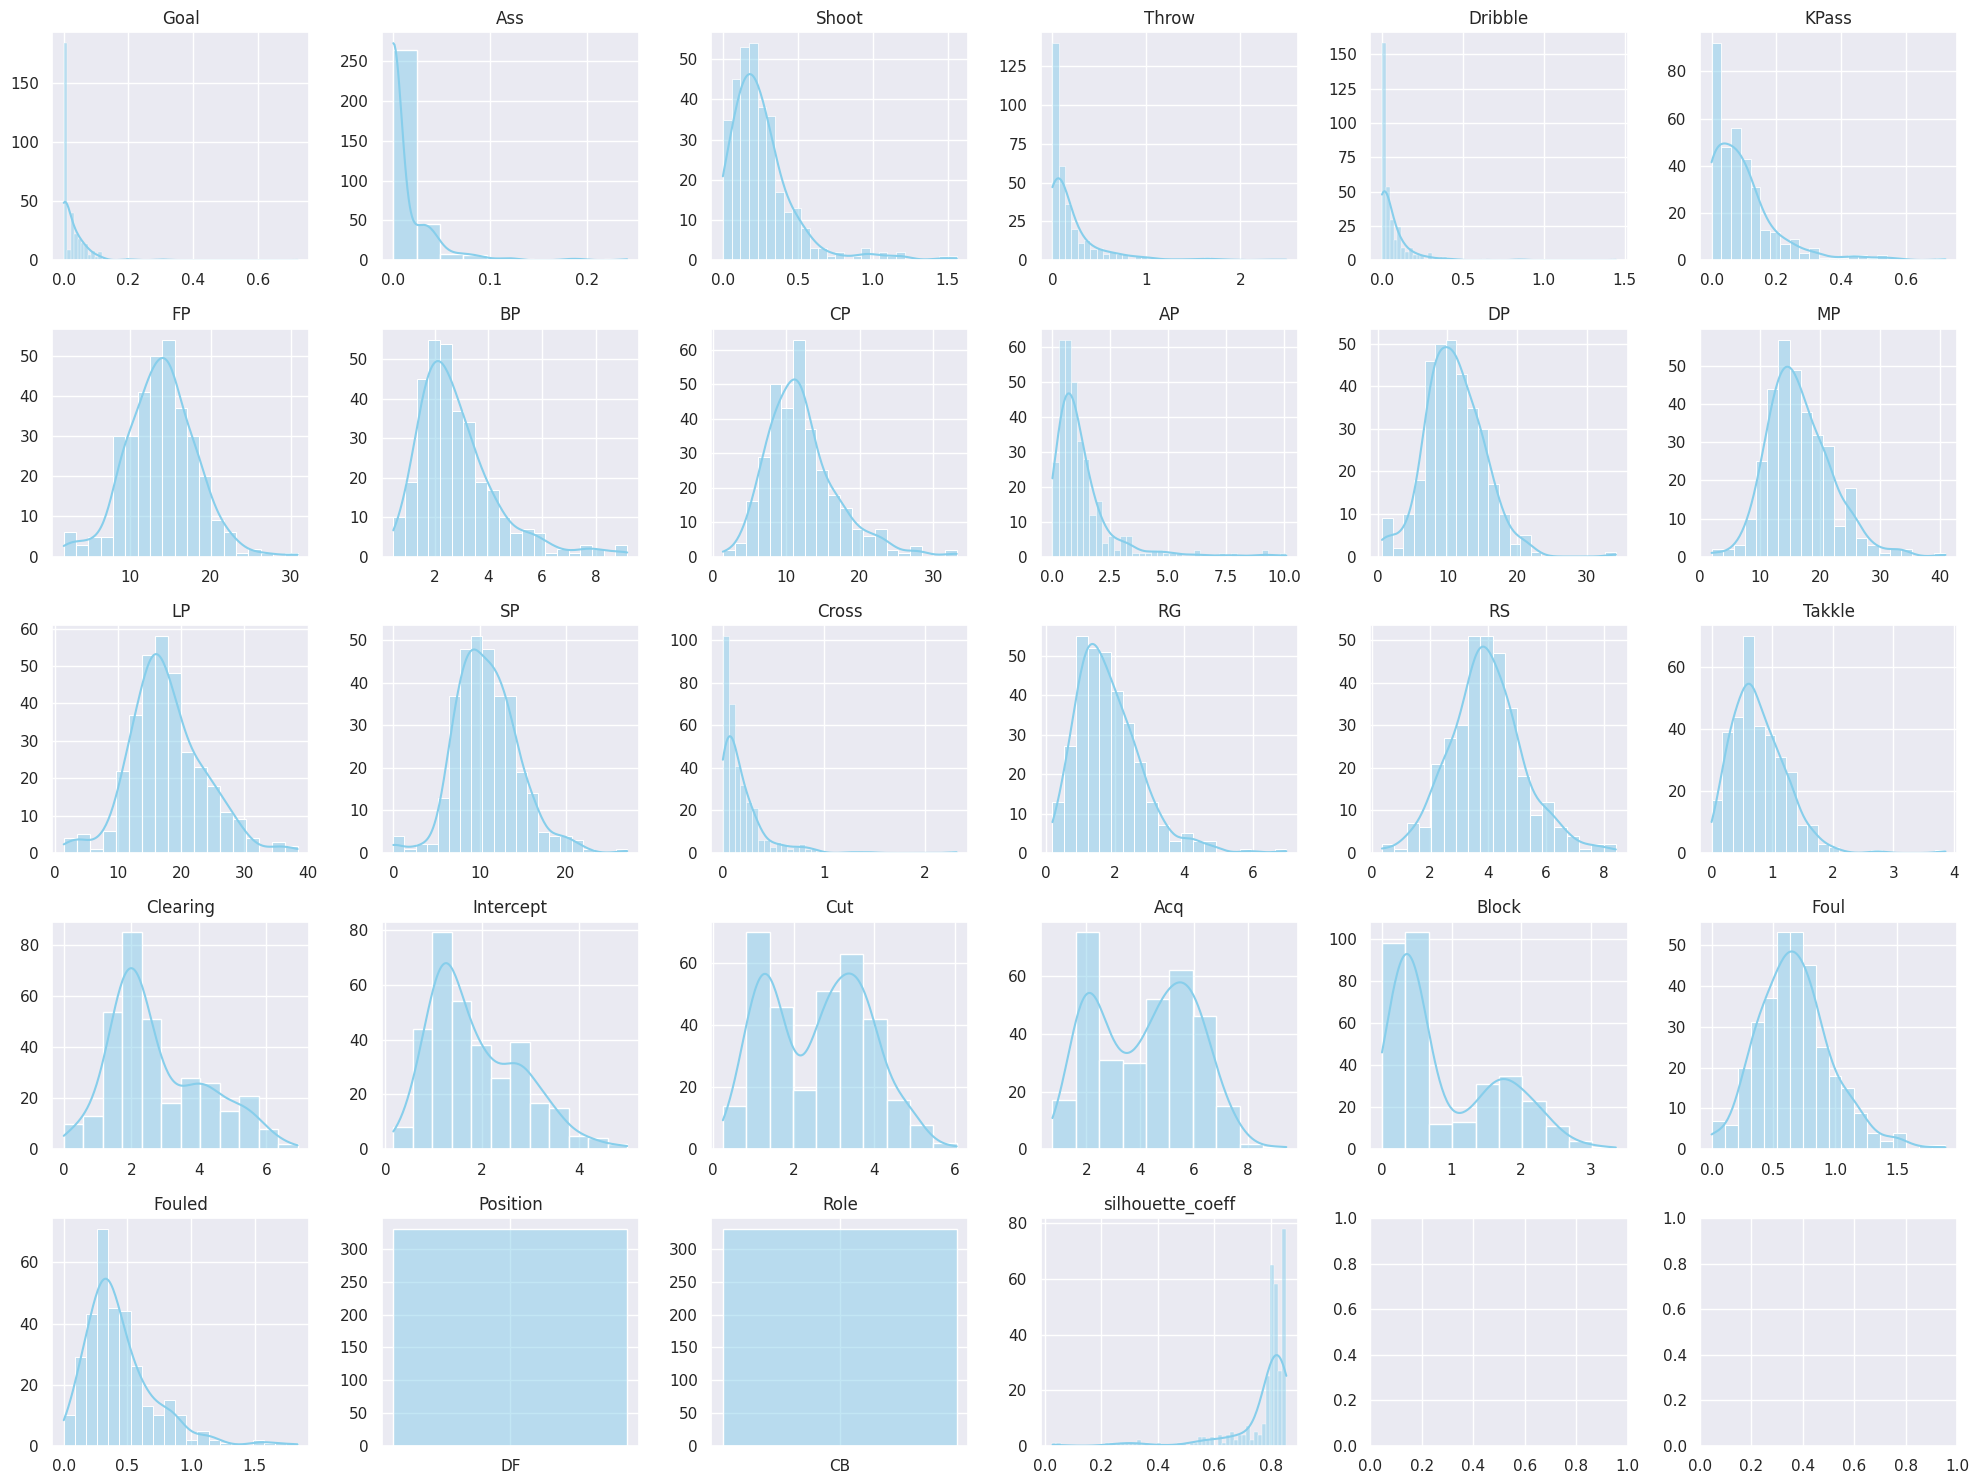

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(CB.columns):
    sns.histplot(data=CB[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

### 정규화

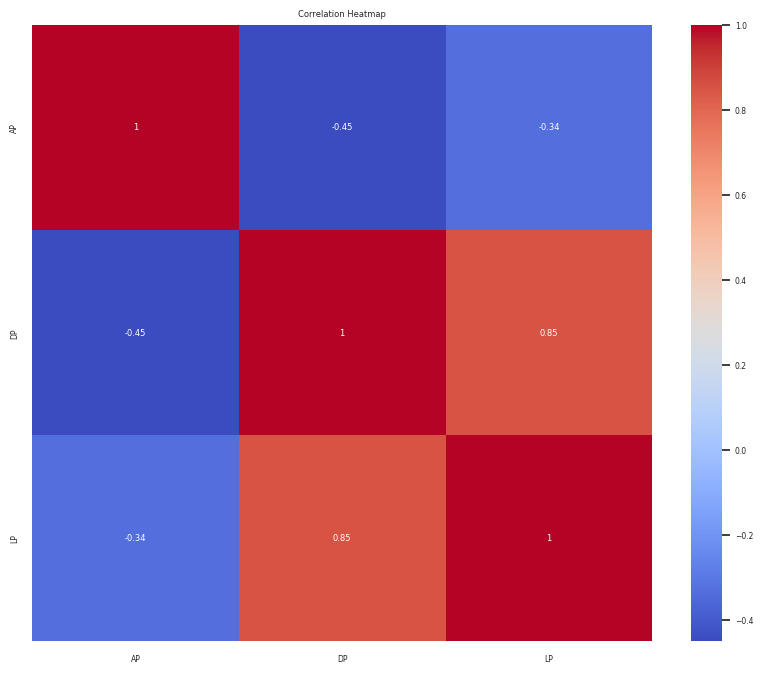

In [ ]:
# 상관관계 분석
corr = temp_CB.corr()

# 히트맵 그리기
sns.set(font_scale=0.5)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

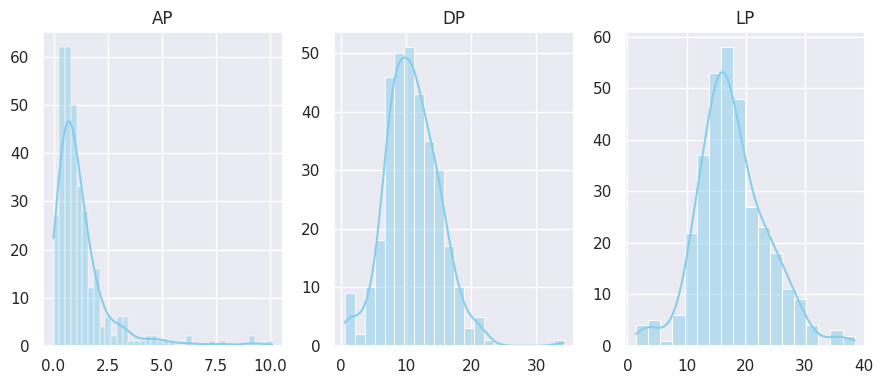

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_CB.columns):
    sns.histplot(data=temp_CB[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
for i in range(len(temp_CB.columns)):
    if temp_CB.columns[i] == 'RS':
        continue
    else:
        temp_CB[temp_CB.columns[i]] = temp_CB[temp_CB.columns[i]].apply(sqrt_transform)

<ipython-input-201-eb6e7d685839>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB[temp_CB.columns[i]] = temp_CB[temp_CB.columns[i]].apply(sqrt_transform)


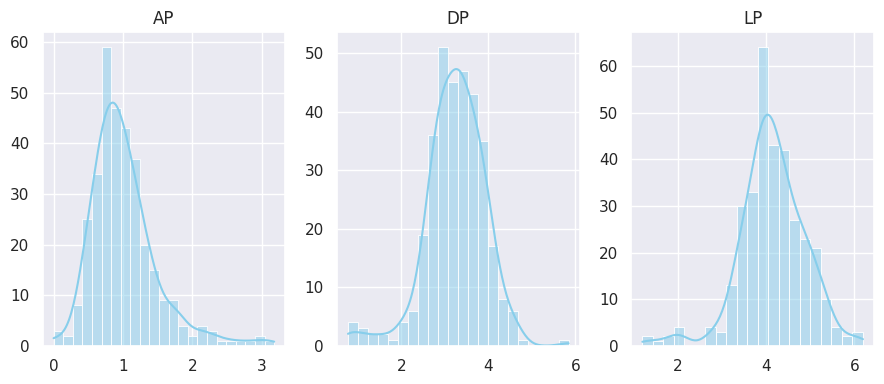

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_CB.columns):
    sns.histplot(data=temp_CB[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
temp_CB

,AP,DP,LP
7,0.875021,2.946743,4.217134
13,1.162518,2.570424,4.040375
23,0.580585,4.244130,5.311240
28,0.716699,3.542302,4.356701
30,0.435469,3.596248,5.119310
...,...,...,...
1670,0.942051,3.350865,4.087468
1671,0.524623,2.889399,3.176750
1675,0.547723,3.098387,3.834058
1693,0.348790,3.435184,4.037537


### 같은 속성 끼리 차원 축소

In [ ]:
aggressor = temp_CB[['Takkle', 'Dribble']]
spreader = temp_CB[[ 'LP', 'CP', 'SP', 'Cut']]
scb = temp_CB[['RG', 'RS', 'Block', 'Clearing']]

In [ ]:
temp1 = temp_CB
temp1 = temp_CB.drop(columns=temp_CB.columns)

In [ ]:
temp_list = [aggressor, spreader, scb]

for i, pos in zip(temp_list, ['aggressor', 'spreader', 'scb']):
    pca = PCA(n_components=1)

    pca.fit(i)
    pca_result = pca.transform(i)

    # 새로운 변수에 저장
    temp1[f"{pos}_pca"] = pca_result

In [ ]:
temp1

,aggressor_pca,spreader_pca,scb_pca
7,0.015551,-0.114239,0.417490
13,0.011732,0.221816,-1.877995
23,0.161114,-1.566139,-0.541267
28,-0.104717,-0.312759,1.451793
30,-0.233117,-1.371546,0.373710
...,...,...,...
1670,0.011511,0.164176,0.994582
1671,0.133696,1.226385,0.083940
1675,-0.327582,0.368133,0.808413
1693,-0.217841,0.082411,-1.598156


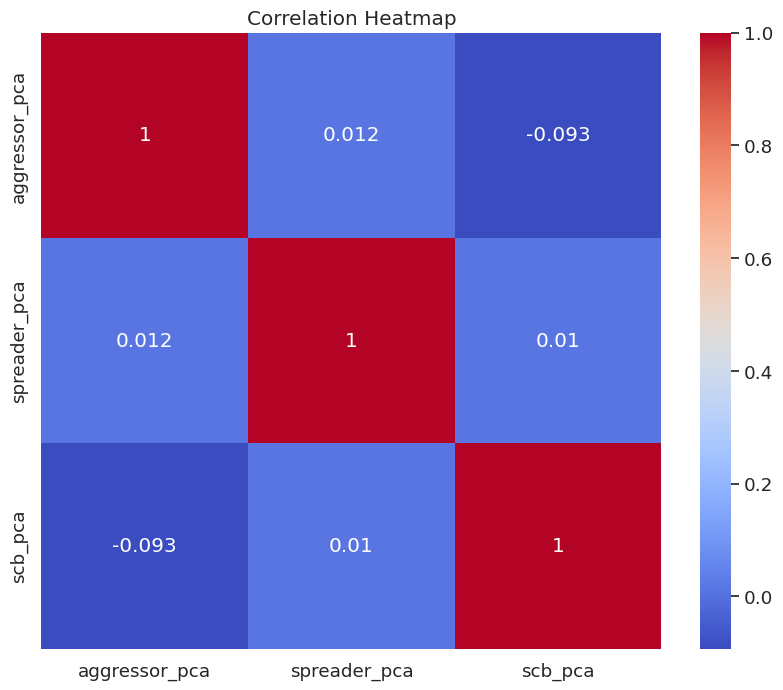

In [ ]:
# 상관관계 분석
corr = temp1.corr()

# 히트맵 그리기
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 군집화 수행

In [ ]:
km_CB = KMeans(n_clusters=3)
km_CB.fit(temp_CB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
temp_CB['Detailed Role'] = km_CB.labels_

<ipython-input-205-498a652ae0e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB['Detailed Role'] = km_CB.labels_


In [ ]:
temp_CB['Detailed Role'] = km_CB.labels_

<ipython-input-206-498a652ae0e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB['Detailed Role'] = km_CB.labels_


In [ ]:
temp_CB[temp_CB['Detailed Role']==0].describe()                                                                                                          #spreader

,AP,DP,LP,Detailed Role
count,126.000000,126.000000,126.000000,126.0
mean,0.873926,3.846562,4.800697,0.0
std,0.333386,0.378262,0.449268,0.0
min,0.000000,3.012887,3.978860,0.0
25%,0.667343,3.589194,4.437050,0.0
50%,0.808906,3.801295,4.767557,0.0
75%,1.040232,4.016372,5.073148,0.0
max,1.878673,5.846329,6.197584,0.0


In [ ]:
temp_CB[temp_CB['Detailed Role']==1].describe()                                                                                                         #aggressor

,AP,DP,LP,Detailed Role
count,15.000000,15.000000,15.000000,15.0
mean,2.288583,1.403980,2.227785,1.0
std,0.660662,0.515643,0.622797,0.0
min,0.966736,0.774984,1.196599,1.0
25%,2.018920,0.971902,1.865086,1.0
50%,2.322202,1.426148,2.089866,1.0
75%,2.759041,1.836106,2.799908,1.0
max,3.178371,2.269408,3.215600,1.0


In [ ]:
temp_CB[temp_CB['Detailed Role']==2].describe()                                                                                                        # scb

,AP,DP,LP,Detailed Role
count,190.000000,190.000000,190.000000,190.0
mean,1.009502,2.992630,3.860662,2.0
std,0.387813,0.347241,0.348304,0.0
min,0.000000,1.912730,2.782433,2.0
25%,0.749676,2.769445,3.611478,2.0
50%,0.970336,3.001059,3.895383,2.0
75%,1.233416,3.265148,4.084301,2.0
max,2.241141,3.728219,4.790835,2.0


In [ ]:
temp_CB['Detailed Role'][temp_CB['Detailed Role'] == 0] = 'Spreader'
temp_CB['Detailed Role'][temp_CB['Detailed Role'] == 1] = 'Aggressor'
temp_CB['Detailed Role'][temp_CB['Detailed Role'] == 2] = 'SCB'

<ipython-input-210-d6ad1559ba32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB['Detailed Role'][temp_CB['Detailed Role'] == 0] = 'Spreader'
<ipython-input-210-d6ad1559ba32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB['Detailed Role'][temp_CB['Detailed Role'] == 0] = 'Spreader'
<ipython-input-210-d6ad1559ba32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB['Detailed Role'][temp_CB['Detailed Role'] == 1]

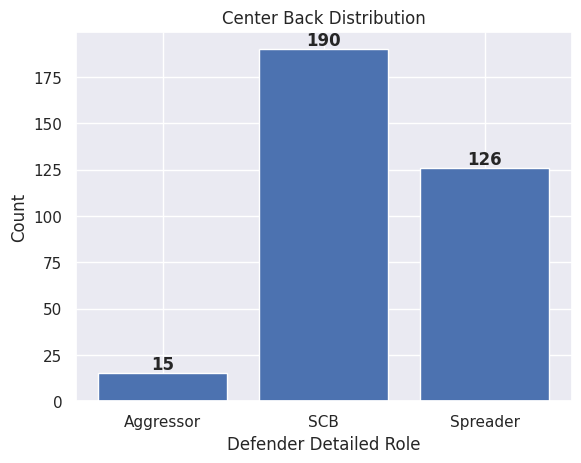

In [ ]:
sns.set(style='darkgrid')

counts = temp_CB['Detailed Role'].value_counts().loc[['Aggressor', 'SCB', 'Spreader']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Center Back Distribution')
plt.xlabel('Defender Detailed Role')
plt.ylabel('Count')
plt.show()

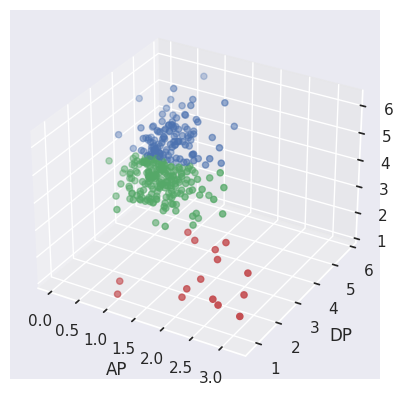

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = temp_CB['AP']
y = temp_CB['DP']
z = temp_CB['LP']
colors = np.where(temp_CB['Detailed Role'] == 'Aggressor', 'r', np.where(temp_CB['Detailed Role'] == 'SCB', 'g', 'b'))

ax.scatter(x, y, z, c=colors)

ax.set_xlabel('AP')
ax.set_ylabel('DP')
ax.set_zlabel('LP')

plt.show()

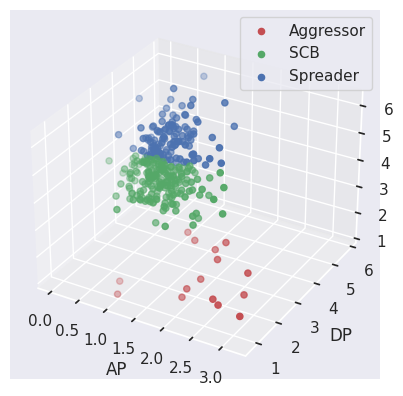

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = temp_CB['AP']
y = temp_CB['DP']
z = temp_CB['LP']
colors = np.where(temp_CB['Detailed Role'] == 'Aggressor', 'r', np.where(temp_CB['Detailed Role'] == 'SCB', 'g', 'b'))

# 범례 레이블 설정
labels = ['Aggressor', 'SCB', 'Spreader']
# 범례 색상 설정
colormap = {'Aggressor': 'r', 'SCB': 'g', 'Spreader': 'b'}

# 점들을 그리기 위한 for문
for label in labels:
    ax.scatter(x[colors==colormap[label]], y[colors==colormap[label]], z[colors==colormap[label]],
               c=colormap[label], label=label)

ax.set_xlabel('AP')
ax.set_ylabel('DP')
ax.set_zlabel('LP')

# 범례 추가
ax.legend()

plt.show()

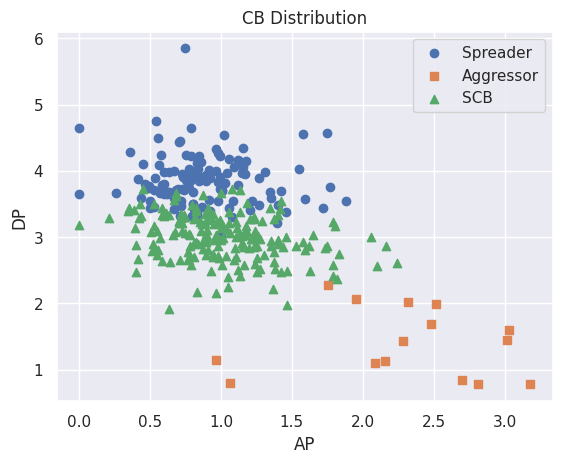

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_CB[temp_CB['Detailed Role']=='Spreader'].index
marker1 = temp_CB[temp_CB['Detailed Role']=='Aggressor'].index
marker2 = temp_CB[temp_CB['Detailed Role']=='SCB'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_CB.loc[marker0, 'AP'], y=temp_CB.loc[marker0, 'DP'], marker='o', label='Spreader')
plt.scatter(x=temp_CB.loc[marker1, 'AP'], y=temp_CB.loc[marker1, 'DP'], marker='s', label='Aggressor')
plt.scatter(x=temp_CB.loc[marker2, 'AP'], y=temp_CB.loc[marker2, 'DP'], marker='^', label='SCB')

plt.xlabel('AP')
plt.ylabel('DP')
plt.title('CB Distribution')
plt.legend()
plt.show()

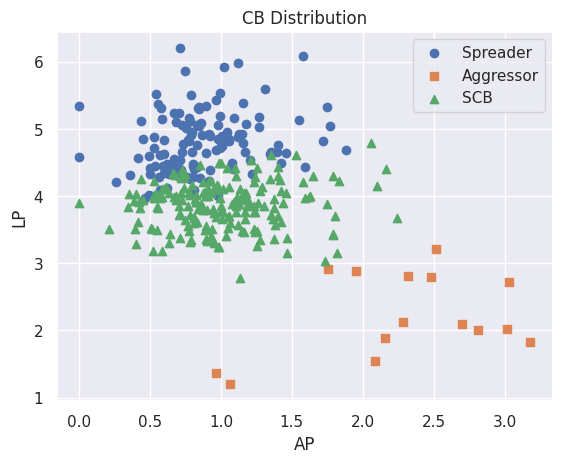

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_CB[temp_CB['Detailed Role']=='Spreader'].index
marker1 = temp_CB[temp_CB['Detailed Role']=='Aggressor'].index
marker2 = temp_CB[temp_CB['Detailed Role']=='SCB'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_CB.loc[marker0, 'AP'], y=temp_CB.loc[marker0, 'LP'], marker='o', label='Spreader')
plt.scatter(x=temp_CB.loc[marker1, 'AP'], y=temp_CB.loc[marker1, 'LP'], marker='s', label='Aggressor')
plt.scatter(x=temp_CB.loc[marker2, 'AP'], y=temp_CB.loc[marker2, 'LP'], marker='^', label='SCB')

plt.xlabel('AP')
plt.ylabel('LP')
plt.title('CB Distribution')
plt.legend()
plt.show()

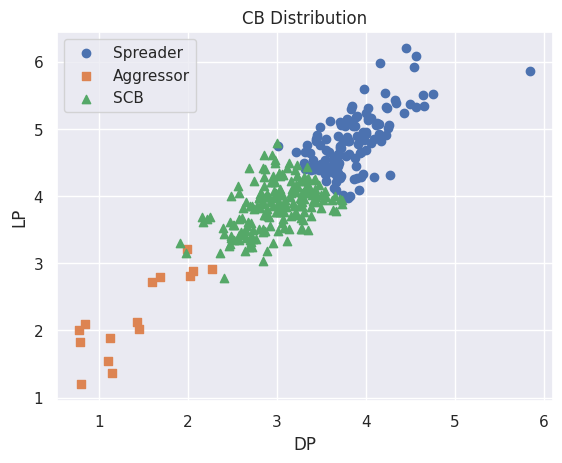

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_CB[temp_CB['Detailed Role']=='Spreader'].index
marker1 = temp_CB[temp_CB['Detailed Role']=='Aggressor'].index
marker2 = temp_CB[temp_CB['Detailed Role']=='SCB'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_CB.loc[marker0, 'DP'], y=temp_CB.loc[marker0, 'LP'], marker='o', label='Spreader')
plt.scatter(x=temp_CB.loc[marker1, 'DP'], y=temp_CB.loc[marker1, 'LP'], marker='s', label='Aggressor')
plt.scatter(x=temp_CB.loc[marker2, 'DP'], y=temp_CB.loc[marker2, 'LP'], marker='^', label='SCB')

plt.xlabel('DP')
plt.ylabel('LP')
plt.title('CB Distribution')
plt.legend()
plt.show()

In [ ]:
temp_CB

,AP,DP,LP,Detailed Role
7,0.875021,2.946743,4.217134,SCB
13,1.162518,2.570424,4.040375,SCB
23,0.580585,4.244130,5.311240,Spreader
28,0.716699,3.542302,4.356701,Spreader
30,0.435469,3.596248,5.119310,Spreader
...,...,...,...,...
1670,0.942051,3.350865,4.087468,SCB
1671,0.524623,2.889399,3.176750,SCB
1675,0.547723,3.098387,3.834058,SCB
1693,0.348790,3.435184,4.037537,SCB


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp_CB[['AP', 'DP', 'LP']], temp_CB['Detailed Role'])
score_samples.shape

(331,)

In [ ]:
temp_CB['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp_CB[['AP', 'DP', 'LP']], temp_CB['Detailed Role'])
np.round(average_score, 4)

<ipython-input-219-1ebe9795bd40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_CB['silhouette_coeff'] = score_samples


0.402

In [ ]:
temp_CB.groupby('Detailed Role')['silhouette_coeff'].mean()

Detailed Role
Aggressor    0.478030
SCB          0.408553
Spreader     0.383188
Name: silhouette_coeff, dtype: float64

In [ ]:
CB['Detailed Role'] = km_CB.labels_
CB['Detailed Role'][CB['Detailed Role'] == 0] = 'Spreader'
CB['Detailed Role'][CB['Detailed Role'] == 1] = 'Aggressor'
CB['Detailed Role'][CB['Detailed Role'] == 2] = 'SCB'
CB = CB[['Role', 'Detailed Role']]
CB

<ipython-input-221-36d564ca9bf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CB['Detailed Role'] = km_CB.labels_
<ipython-input-221-36d564ca9bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CB['Detailed Role'][CB['Detailed Role'] == 0] = 'Spreader'
<ipython-input-221-36d564ca9bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CB['Detailed Role'][CB['Detailed Role'] =

,Role,Detailed Role
7,CB,SCB
13,CB,SCB
23,CB,Spreader
28,CB,Spreader
30,CB,Spreader
...,...,...
1670,CB,SCB
1671,CB,SCB
1675,CB,SCB
1693,CB,SCB




---



## 측면 수비수

- Overlapper : 최전방으로 들어가서 드리블하고 크로스를 올린다. 윙백
- progressor : 긴 패스와 전진 패스, 크로스를 자주 시도한다. 볼을 점유하고있는 상황에 활발하게 움직인다.
- Safety : 뒤에 머무르며 최후방에서 벌어지는 상황에 관여하고 공이 본인에게 있던 없던 위험을 감수하지 않는다.

필요한 속성 : 드리블, 크로스, 롱 패스, 전진 패스, 태클, 인터셉트, 차단, 파울

In [ ]:
FB = temp_DF[temp_DF['Role'] == 'FB']
temp_FB = FB[['AP', 'LP', 'Block']]
temp_FB

,AP,LP,Block
5,7.328767,11.489726,1.695205
6,2.804703,19.082306,1.858331
9,7.464239,10.117035,1.482445
18,5.058698,8.132337,1.408751
32,6.434404,13.064780,1.959717
...,...,...,...
1686,13.439198,12.060176,0.100293
1689,3.913043,11.521739,0.380435
1690,11.284635,16.574307,0.050378
1696,9.894737,21.473684,0.421053


### 정규화

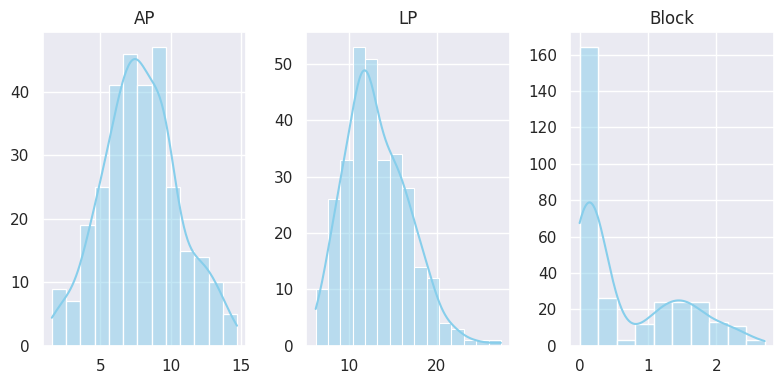

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_FB.columns):
    sns.histplot(data=temp_FB[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

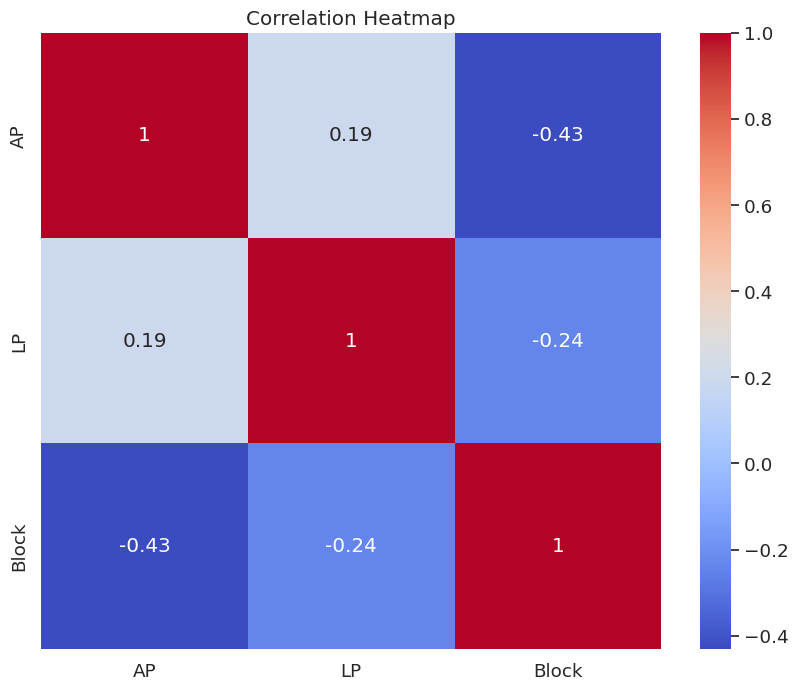

In [ ]:
# 상관관계 분석
corr = temp_FB.corr()

# 히트맵 그리기
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
for i in range(len(temp_FB.columns)):
    if temp_FB.columns[i] == 'AP':
        continue
    else:
        temp_FB[temp_FB.columns[i]] = temp_FB[temp_FB.columns[i]].apply(sqrt_transform)

<ipython-input-129-e5fc7e6c95bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FB[temp_FB.columns[i]] = temp_FB[temp_FB.columns[i]].apply(sqrt_transform)


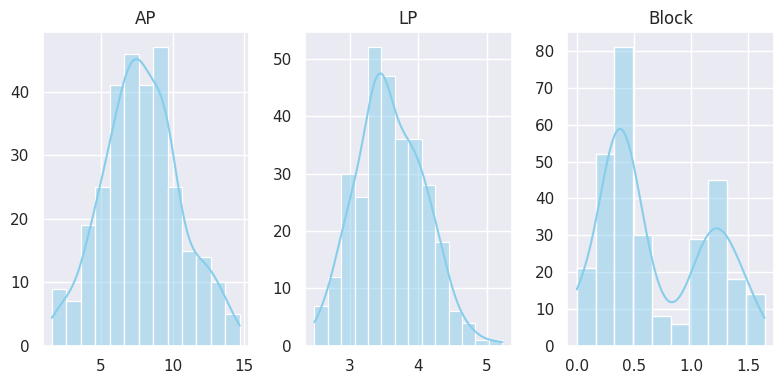

In [ ]:
sns.set(style='darkgrid')  # 스타일 설정

# subplot으로 여러 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes = axes.ravel()  # 2차원 배열을 1차원으로 변경

# histplot 그리기
for i, column in enumerate(temp_FB.columns):
    sns.histplot(data=temp_FB[column], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'{column}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

같은 속성 끼리 차원 축소

In [ ]:
overlapper = temp_FB[['Dribble', 'Cross']]
progressor = temp_FB[['Cross', 'LP', 'FP']]
safety = temp_FB[['Takkle', 'Intercept', 'Cut', 'Foul']]

In [ ]:
temp2 = temp_FB
temp2 = temp_FB.drop(columns=temp_FB.columns)

In [ ]:
temp_list = [overlapper, progressor, safety]

for i, pos in zip(temp_list, ['overlapper', 'progressor', 'safety']):
    pca = PCA(n_components=1)

    pca.fit(i)
    pca_result = pca.transform(i)

    # 새로운 변수에 저장
    temp2[f"{pos}_pca"] = pca_result

In [ ]:
temp2

,overlapper_pca,progressor_pca,safety_pca
5,0.013383,-0.173196,0.626713
6,0.192775,0.648193,0.528081
9,-0.277178,-0.675061,0.509278
18,-0.000491,-0.665735,0.460863
32,-0.761571,-0.276940,0.580953
...,...,...,...
1686,-0.729805,-0.178512,-0.206601
1689,0.689551,-0.143779,-0.495875
1690,-0.327804,0.827158,-0.296757
1696,-0.243933,1.523792,-0.450064


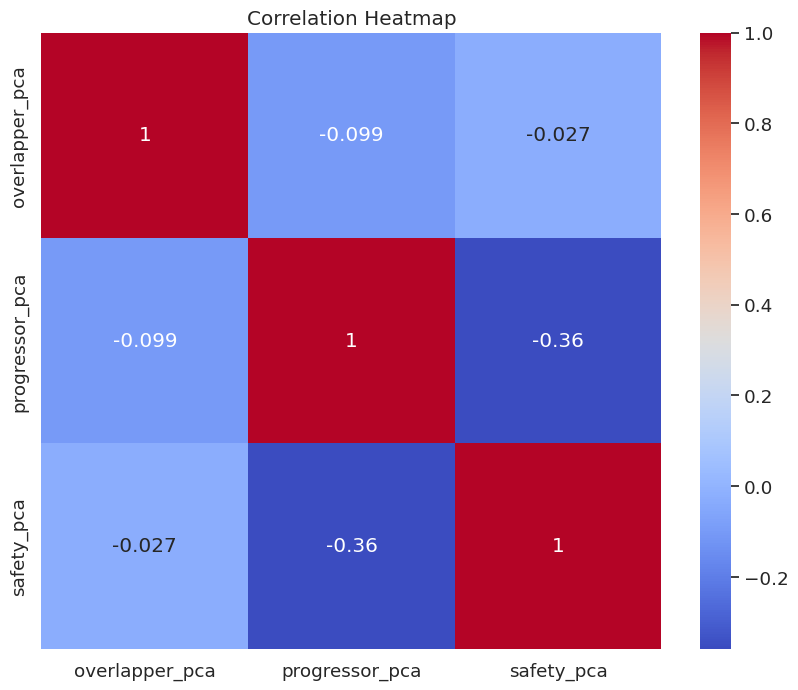

In [ ]:
# 상관관계 분석
corr = temp2.corr()

# 히트맵 그리기
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 군집화 수행

In [ ]:
km_FB = KMeans(n_clusters=3)
km_FB.fit(temp_FB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
temp_FB['Detailed Role'] = km_FB.labels_

<ipython-input-132-7e14e27c64ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FB['Detailed Role'] = km_FB.labels_


In [ ]:
temp_FB[temp_FB['Detailed Role']==0].describe()                                                                                                          # safety

,AP,LP,Block,Detailed Role
count,106.000000,106.000000,106.000000,106.0
mean,5.048760,3.507824,0.958471,0.0
std,1.380832,0.524301,0.446221,0.0
min,1.565217,2.486378,0.000000,0.0
25%,4.259017,3.081911,0.544745,0.0
50%,5.413954,3.472167,1.083506,0.0
75%,6.212099,3.862449,1.298068,0.0
max,6.735267,4.834089,1.645225,0.0


In [ ]:
temp_FB[temp_FB['Detailed Role']==1].describe()                                                                                                          # progressor

,AP,LP,Block,Detailed Role
count,152.000000,152.000000,152.000000,152.0
mean,8.479367,3.580347,0.577329,1.0
std,1.007230,0.451552,0.415187,0.0
min,6.786207,2.671855,0.000000,1.0
25%,7.569564,3.286793,0.315597,1.0
50%,8.434195,3.531249,0.413004,1.0
75%,9.441825,3.884037,1.006341,1.0
max,10.315289,5.226704,1.503135,1.0


In [ ]:
temp_FB[temp_FB['Detailed Role']==2].describe()                                                                                                          # overlapper

,AP,LP,Block,Detailed Role
count,46.000000,46.000000,46.000000,46.0
mean,12.236335,3.836664,0.413870,2.0
std,1.099985,0.469682,0.327621,0.0
min,10.414747,2.782609,0.000000,2.0
25%,11.338176,3.480351,0.247652,2.0
50%,12.198143,3.937175,0.330281,2.0
75%,12.947985,4.151173,0.427207,2.0
max,14.686567,4.973503,1.359650,2.0


In [ ]:
temp_FB['Detailed Role'][temp_FB['Detailed Role'] == 'safety'] = 'Safety'
temp_FB['Detailed Role'][temp_FB['Detailed Role'] == 'progressor'] = 'Progressor'
temp_FB['Detailed Role'][temp_FB['Detailed Role'] == 'overlapper'] = 'Overlapper'

<ipython-input-138-cf6a0f7156ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FB['Detailed Role'][temp_FB['Detailed Role'] == 'safety'] = 'Safety'
<ipython-input-138-cf6a0f7156ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FB['Detailed Role'][temp_FB['Detailed Role'] == 'safety'] = 'Safety'
<ipython-input-138-cf6a0f7156ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FB['Detailed Role'][temp_FB['Detailed Ro

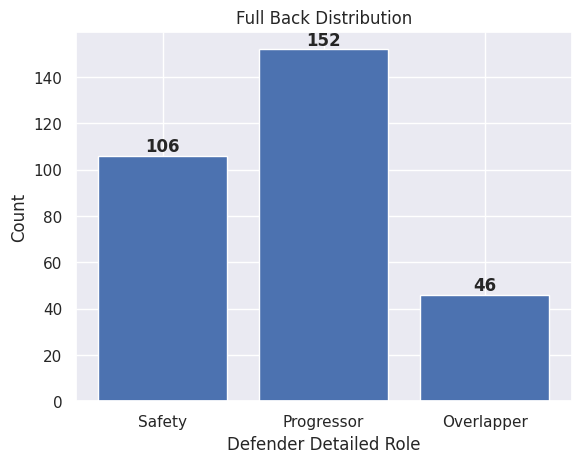

In [ ]:
sns.set(style='darkgrid')

counts = temp_FB['Detailed Role'].value_counts().loc[['Safety', 'Progressor', 'Overlapper']]

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)

for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title('Full Back Distribution')
plt.xlabel('Defender Detailed Role')
plt.ylabel('Count')
plt.show()

In [ ]:
temp_FB

,AP,LP,Block,Detailed Role
5,7.328767,3.389650,1.302001,Progressor
6,2.804703,4.368330,1.363206,Safety
9,7.464239,3.180729,1.217557,Progressor
18,5.058698,2.851725,1.186908,Safety
32,6.434404,3.614523,1.399899,Safety
...,...,...,...,...
1686,13.439198,3.472776,0.316690,Overlapper
1689,3.913043,3.394369,0.616794,Safety
1690,11.284635,4.071156,0.224450,Overlapper
1696,9.894737,4.633971,0.648886,Progressor


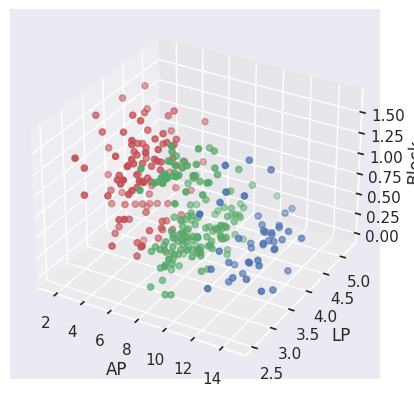

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = temp_FB['AP']
y = temp_FB['LP']
z = temp_FB['Block']
colors = np.where(temp_FB['Detailed Role'] == 'Safety', 'r', np.where(temp_FB['Detailed Role'] == 'Progressor', 'g', 'b'))

ax.scatter(x, y, z, c=colors)

ax.set_xlabel('AP')
ax.set_ylabel('LP')
ax.set_zlabel('Block')

plt.show()

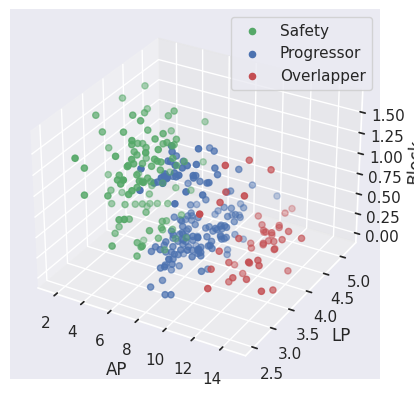

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = temp_FB['AP']
y = temp_FB['LP']
z = temp_FB['Block']
colors = np.where(temp_FB['Detailed Role'] == 'Overlapper', 'r', np.where(temp_FB['Detailed Role'] == 'Progressor', 'b', 'g'))

# 범례 레이블 설정
labels = ['Safety', 'Progressor', 'Overlapper']
# 범례 색상 설정
colormap = {'Overlapper': 'r', 'Safety': 'g', 'Progressor': 'b'}

# 점들을 그리기 위한 for문
for label in labels:
    ax.scatter(x[colors==colormap[label]], y[colors==colormap[label]], z[colors==colormap[label]],
               c=colormap[label], label=label)

ax.set_xlabel('AP')
ax.set_ylabel('LP')
ax.set_zlabel('Block')

# 범례 추가
ax.legend()

plt.show()

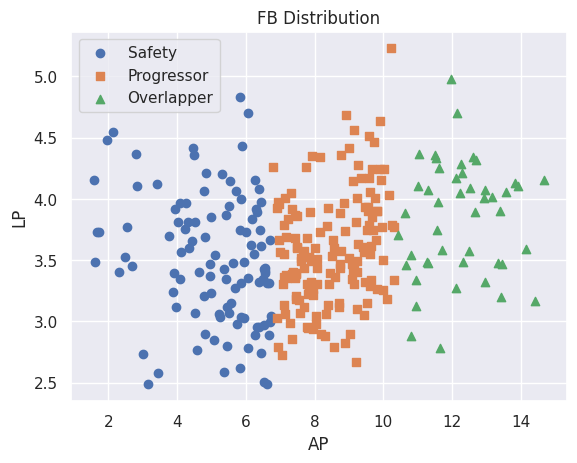

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_FB[temp_FB['Detailed Role']=='Safety'].index
marker1 = temp_FB[temp_FB['Detailed Role']=='Progressor'].index
marker2 = temp_FB[temp_FB['Detailed Role']=='Overlapper'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_FB.loc[marker0, 'AP'], y=temp_FB.loc[marker0, 'LP'], marker='o', label='Safety')
plt.scatter(x=temp_FB.loc[marker1, 'AP'], y=temp_FB.loc[marker1, 'LP'], marker='s', label='Progressor')
plt.scatter(x=temp_FB.loc[marker2, 'AP'], y=temp_FB.loc[marker2, 'LP'], marker='^', label='Overlapper')

plt.xlabel('AP')
plt.ylabel('LP')
plt.title('FB Distribution')
plt.legend()
plt.show()

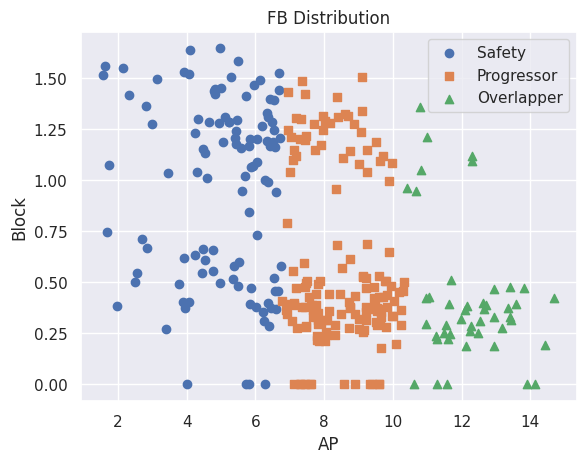

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_FB[temp_FB['Detailed Role']=='Safety'].index
marker1 = temp_FB[temp_FB['Detailed Role']=='Progressor'].index
marker2 = temp_FB[temp_FB['Detailed Role']=='Overlapper'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_FB.loc[marker0, 'AP'], y=temp_FB.loc[marker0, 'Block'], marker='o', label='Safety')
plt.scatter(x=temp_FB.loc[marker1, 'AP'], y=temp_FB.loc[marker1, 'Block'], marker='s', label='Progressor')
plt.scatter(x=temp_FB.loc[marker2, 'AP'], y=temp_FB.loc[marker2, 'Block'], marker='^', label='Overlapper')

plt.xlabel('AP')
plt.ylabel('Block')
plt.title('FB Distribution')
plt.legend()
plt.show()

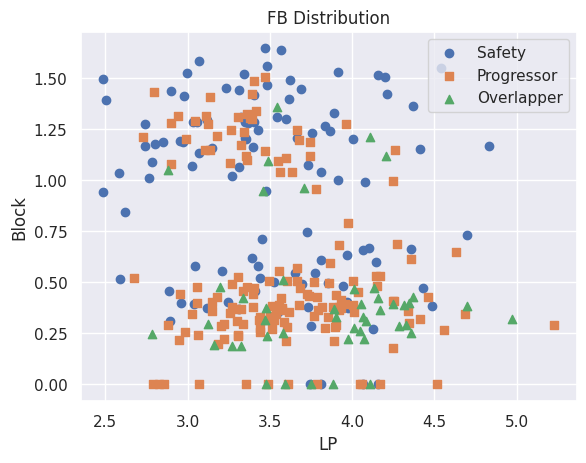

In [ ]:
# 군집 값이 0, 1인 경우마다 별도의 인덱스 추출
marker0 = temp_FB[temp_FB['Detailed Role']=='Safety'].index
marker1 = temp_FB[temp_FB['Detailed Role']=='Progressor'].index
marker2 = temp_FB[temp_FB['Detailed Role']=='Overlapper'].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 Throw, Cross 값 추출.
plt.scatter(x=temp_FB.loc[marker0, 'LP'], y=temp_FB.loc[marker0, 'Block'], marker='o', label='Safety')
plt.scatter(x=temp_FB.loc[marker1, 'LP'], y=temp_FB.loc[marker1, 'Block'], marker='s', label='Progressor')
plt.scatter(x=temp_FB.loc[marker2, 'LP'], y=temp_FB.loc[marker2, 'Block'], marker='^', label='Overlapper')

plt.xlabel('LP')
plt.ylabel('Block')
plt.title('FB Distribution')
plt.legend()
plt.show()

In [ ]:
temp_FB

,AP,LP,Block,Detailed Role
5,7.328767,3.389650,1.302001,Progressor
6,2.804703,4.368330,1.363206,Safety
9,7.464239,3.180729,1.217557,Progressor
18,5.058698,2.851725,1.186908,Safety
32,6.434404,3.614523,1.399899,Safety
...,...,...,...,...
1686,13.439198,3.472776,0.316690,Overlapper
1689,3.913043,3.394369,0.616794,Safety
1690,11.284635,4.071156,0.224450,Overlapper
1696,9.894737,4.633971,0.648886,Progressor


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
score_samples = silhouette_samples(temp_FB[['AP', 'LP', 'Block']], temp_FB['Detailed Role'])
score_samples.shape

(304,)

In [ ]:
temp_FB['silhouette_coeff'] = score_samples
average_score = silhouette_score(temp_FB[['AP', 'LP', 'Block']], temp_FB['Detailed Role'])
np.round(average_score, 4)

<ipython-input-152-5ab6aef3a6e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_FB['silhouette_coeff'] = score_samples


0.4649

In [ ]:
temp_FB.groupby('Detailed Role')['silhouette_coeff'].mean()

Detailed Role
Overlapper    0.565981
Progressor    0.456361
Safety        0.433328
Name: silhouette_coeff, dtype: float64

In [ ]:
FB['Detailed Role'] = km_FB.labels_

<ipython-input-154-fc4fd337d1d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FB['Detailed Role'] = km_FB.labels_


In [ ]:
FB['Detailed Role'][FB['Detailed Role'] == 0] = 'Safety'
FB['Detailed Role'][FB['Detailed Role'] == 1] = 'Progressor'
FB['Detailed Role'][FB['Detailed Role'] == 2] = 'Overlapper'

<ipython-input-155-e433a908c87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FB['Detailed Role'][FB['Detailed Role'] == 0] = 'Safety'
<ipython-input-155-e433a908c87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FB['Detailed Role'][FB['Detailed Role'] == 0] = 'Safety'
<ipython-input-155-e433a908c87b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FB['Detailed Role'][FB['Detailed Role'] == 1] = 'Progressor'
<ipython-input-155

In [ ]:
FB = FB[['Role', 'Detailed Role']]
FB

,Role,Detailed Role
5,FB,Progressor
6,FB,Safety
9,FB,Progressor
18,FB,Safety
32,FB,Safety
...,...,...
1686,FB,Overlapper
1689,FB,Safety
1690,FB,Overlapper
1696,FB,Progressor


# CB 통합

In [ ]:
a = CB.reset_index()
a

,index,Role,Detailed Role
0,7,CB,SCB
1,13,CB,SCB
2,23,CB,Spreader
3,28,CB,Spreader
4,30,CB,Spreader
...,...,...,...
326,1670,CB,SCB
327,1671,CB,SCB
328,1675,CB,SCB
329,1693,CB,SCB


In [ ]:
b = FB.reset_index()
b

,index,Role,Detailed Role
0,5,FB,Progressor
1,6,FB,Safety
2,9,FB,Progressor
3,18,FB,Safety
4,32,FB,Safety
...,...,...,...
299,1686,FB,Overlapper
300,1689,FB,Safety
301,1690,FB,Overlapper
302,1696,FB,Progressor


In [ ]:
result_df = pd.concat([a, b])
result_df

,index,Role,Detailed Role
0,7,CB,SCB
1,13,CB,SCB
2,23,CB,Spreader
3,28,CB,Spreader
4,30,CB,Spreader
...,...,...,...
299,1686,FB,Overlapper
300,1689,FB,Safety
301,1690,FB,Overlapper
302,1696,FB,Progressor


In [ ]:
result_df = result_df.sort_values(by='index')
result_df = result_df.set_index('index')
result_DF_df = result_df.rename_axis(None)
result_DF_df

,Role,Detailed Role
5,FB,Progressor
6,FB,Safety
7,CB,SCB
9,FB,Progressor
13,CB,SCB
...,...,...
1690,FB,Overlapper
1693,CB,SCB
1696,FB,Progressor
1698,CB,SCB


In [ ]:
result_DF_df.to_csv('DF.csv')